# Step 1: Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [2]:
df = pd.read_csv (r'D:\Downloads\hmnist.csv')
print (df)

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197   

In [3]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [4]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [5]:
print(len(train_set))

8012


In [6]:
print(len(test_set))

2003


In [7]:
df.label.unique()

array([4, 5, 2, 0, 6, 1, 3], dtype=int64)

In [8]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [9]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [10]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Step 4: Exploratory Data Analysis and Preprocessing

<AxesSubplot:xlabel='label', ylabel='count'>

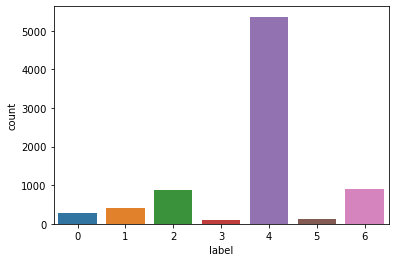

In [11]:
import seaborn as sns

sns.countplot(train_set['label'])

In [12]:
!pip install imbalanced-learn==0.6.0


In [15]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='label', ylabel='count'>

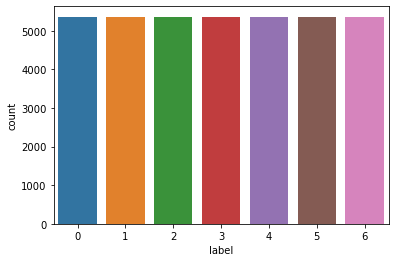

In [16]:
sns.countplot(y_train)

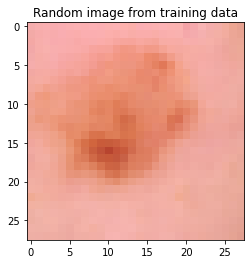

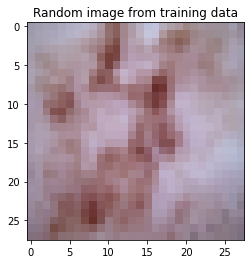

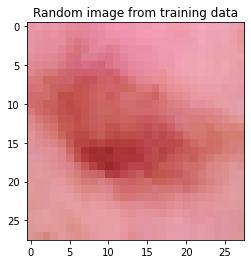

In [17]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()


# Step 5: Model Building (CNN)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [19]:
%time 

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

# Step 6: Setting Optimizer & Annealing

In [20]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

In [21]:
%time 
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model


In [22]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 100,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 1.1285 - accuracy: 0.5983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 56ms/step - loss: 1.1285 - accuracy: 0.5983 - val_loss: 2.9178 - val_accuracy: 0.0814
Epoch 2/100
234/235 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8698WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 54ms/step - loss: 0.3927 - accuracy: 0.8698 - val_loss: 1.5910 - val_accuracy: 0.3871
Epoch 3/100
234/235 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9113WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 55ms/step - loss: 0.2581 - accuracy: 0.9112 - val_loss: 1.5297 - val_accuracy: 0.4236
Epoch 4/100
235/235 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9367WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.1878 - accuracy: 0.9367 - val_loss: 0.9916 - val_accuracy: 0.5814
Epoch 5/100
235/235 [==============================] - ETA: 0s - loss: 0.1669 - accuracy: 0.9430WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.1669 - accuracy: 0.9430 - val_loss: 1.2316 - val_accuracy: 0.5060
Epoch 6/100
234/235 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9537WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.1336 - accuracy: 0.9537 - val_loss: 1.0268 - val_accuracy: 0.6031
Epoch 7/100
234/235 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9591WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.1179 - accuracy: 0.9591 - val_loss: 0.8245 - val_accuracy: 0.6260
Epoch 8/100
234/235 [============================>.] - ETA: 0s - loss: 0.1123 - accuracy: 0.9612WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.1123 - accuracy: 0.9612 - val_loss: 0.4381 - val_accuracy: 0.8496
Epoch 9/100
235/235 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9674WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0919 - accuracy: 0.9674 - val_loss: 0.8997 - val_accuracy: 0.5976
Epoch 10/100
235/235 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9713WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0828 - accuracy: 0.9713 - val_loss: 0.9035 - val_accuracy: 0.6448
Epoch 11/100
234/235 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9736WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0734 - accuracy: 0.9737 - val_loss: 0.4406 - val_accuracy: 0.7883
Epoch 12/100
234/235 [============================>.] - ETA: 0s - loss: 0.0686 - accuracy: 0.9756WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0685 - accuracy: 0.9757 - val_loss: 0.5161 - val_accuracy: 0.7887
Epoch 13/100
234/235 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9785WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0605 - accuracy: 0.9784 - val_loss: 0.7788 - val_accuracy: 0.7054
Epoch 14/100
234/235 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9739WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0771 - accuracy: 0.9738 - val_loss: 0.4445 - val_accuracy: 0.8194
Epoch 15/100
234/235 [============================>.] - ETA: 0s - loss: 0.0502 - accuracy: 0.9830WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.8302 - val_accuracy: 0.6930
Epoch 16/100
234/235 [============================>.] - ETA: 0s - loss: 0.0537 - accuracy: 0.9814WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0537 - accuracy: 0.9815 - val_loss: 0.1489 - val_accuracy: 0.9452
Epoch 17/100
234/235 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9841WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0494 - accuracy: 0.9841 - val_loss: 0.6818 - val_accuracy: 0.7555
Epoch 18/100
235/235 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9862WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0417 - accuracy: 0.9862 - val_loss: 0.2422 - val_accuracy: 0.9134
Epoch 19/100
235/235 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9906WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.2233 - val_accuracy: 0.9079
Epoch 20/100
235/235 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9907WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0606 - val_accuracy: 0.9791
Epoch 21/100
235/235 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9885WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.1669 - val_accuracy: 0.9518
Epoch 22/100
235/235 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9889WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.3301 - val_accuracy: 0.8834
Epoch 23/100
234/235 [============================>.] - ETA: 0s - loss: 0.0399 - accuracy: 0.9870WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 63ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.2511 - val_accuracy: 0.9122
Epoch 24/100
235/235 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9912WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.1606 - val_accuracy: 0.9414
Epoch 25/100
235/235 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9924WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.3737 - val_accuracy: 0.8914
Epoch 26/100
234/235 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9933WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.9456 - val_accuracy: 0.7418
Epoch 27/100
235/235 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9899WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.5287 - val_accuracy: 0.8318
Epoch 28/100
235/235 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9915WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.3668 - val_accuracy: 0.8616
Epoch 29/100
234/235 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9921WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 0.1293 - val_accuracy: 0.9561
Epoch 30/100
234/235 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9915WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0902 - val_accuracy: 0.9725
Epoch 31/100
235/235 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9933WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 62ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0522 - val_accuracy: 0.9844
Epoch 32/100
235/235 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0164 - accuracy: 0.9941 - val_loss: 0.0758 - val_accuracy: 0.9715
Epoch 33/100
234/235 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0597 - val_accuracy: 0.9729
Epoch 34/100
234/235 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9945WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.2015 - val_accuracy: 0.9299
Epoch 35/100
234/235 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9955WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 57ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.2485 - val_accuracy: 0.9111
Epoch 36/100
234/235 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9940WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 1.0482 - val_accuracy: 0.7083
Epoch 37/100
234/235 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 13s 55ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.1927 - val_accuracy: 0.9481
Epoch 38/100
235/235 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.9034 - val_accuracy: 0.7719
Epoch 39/100
234/235 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9931WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 1.8888 - val_accuracy: 0.6477
Epoch 40/100
235/235 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 3.1351 - val_accuracy: 0.4666
Epoch 41/100
235/235 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 70ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.1715 - val_accuracy: 0.9510
Epoch 42/100
234/235 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9969WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 65ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.4543 - val_accuracy: 0.8765
Epoch 43/100
234/235 [============================>.] - ETA: 0s - loss: 0.0111 - accuracy: 0.9965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.3692 - val_accuracy: 0.9120
Epoch 44/100
235/235 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9929WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.5826 - val_accuracy: 0.8478
Epoch 45/100
235/235 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9938WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.1622 - val_accuracy: 0.9484
Epoch 46/100
235/235 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9977WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 63ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.4094 - val_accuracy: 0.9023
Epoch 47/100
235/235 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 62ms/step - loss: 0.0107 - accuracy: 0.9961 - val_loss: 0.5781 - val_accuracy: 0.8603
Epoch 48/100
235/235 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.1073 - val_accuracy: 0.9717
Epoch 49/100
235/235 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0081 - accuracy: 0.9970 - val_loss: 0.3344 - val_accuracy: 0.9035
Epoch 50/100
235/235 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9936WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.2354 - val_accuracy: 0.9271
Epoch 51/100
235/235 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9973WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 2.3170 - val_accuracy: 0.5701
Epoch 52/100
234/235 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.2398 - val_accuracy: 0.9319
Epoch 53/100
235/235 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 62ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0544 - val_accuracy: 0.9844
Epoch 54/100
234/235 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9960WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0440 - val_accuracy: 0.9836
Epoch 55/100
235/235 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.9116 - val_accuracy: 0.8065
Epoch 56/100
234/235 [============================>.] - ETA: 0s - loss: 0.0111 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.1029 - val_accuracy: 0.9659
Epoch 57/100
235/235 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.1143 - val_accuracy: 0.9653
Epoch 58/100
235/235 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9976WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 1.0536 - val_accuracy: 0.7699
Epoch 59/100
235/235 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 60/100
235/235 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9955WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.3820 - val_accuracy: 0.8899
Epoch 61/100
234/235 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.3940 - val_accuracy: 0.8810
Epoch 62/100
234/235 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.4278 - val_accuracy: 0.8843
Epoch 63/100
234/235 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9986WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.1684 - val_accuracy: 0.9542
Epoch 64/100
235/235 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.1153 - val_accuracy: 0.9722
Epoch 65/100
235/235 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9949WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.5411 - val_accuracy: 0.8577
Epoch 66/100
234/235 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0634 - val_accuracy: 0.9775
Epoch 67/100
234/235 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9984WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.2903 - val_accuracy: 0.9296
Epoch 68/100
235/235 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9980WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0536 - val_accuracy: 0.9834
Epoch 69/100
234/235 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.7125 - val_accuracy: 0.7949
Epoch 70/100
234/235 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9959WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0744 - val_accuracy: 0.9760
Epoch 71/100
235/235 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.1213 - val_accuracy: 0.9629
Epoch 72/100
235/235 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9986WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 63ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.2486 - val_accuracy: 0.9251
Epoch 73/100
235/235 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 63ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.4993 - val_accuracy: 0.8605
Epoch 74/100
235/235 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9974WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.6270 - val_accuracy: 0.8595
Epoch 75/100
234/235 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0464 - val_accuracy: 0.9851
Epoch 76/100
235/235 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0491 - val_accuracy: 0.9820
Epoch 77/100
234/235 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.2506 - val_accuracy: 0.9321
Epoch 78/100
235/235 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9980WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 58ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0491 - val_accuracy: 0.9856
Epoch 79/100
234/235 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9976WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.1715 - val_accuracy: 0.9424
Epoch 80/100
235/235 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0215 - val_accuracy: 0.9943
Epoch 81/100
234/235 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9986WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.6560 - val_accuracy: 0.8323
Epoch 82/100
235/235 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0069 - val_accuracy: 0.9963
Epoch 83/100
234/235 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9993WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0436 - val_accuracy: 0.9855
Epoch 84/100
234/235 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 2.5038 - val_accuracy: 0.4051
Epoch 85/100
235/235 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.1401 - val_accuracy: 0.9465
Epoch 86/100
235/235 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9985WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0421 - val_accuracy: 0.9838
Epoch 87/100
235/235 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0650 - val_accuracy: 0.9780
Epoch 88/100
235/235 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 89/100
235/235 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0417 - val_accuracy: 0.9892
Epoch 90/100
235/235 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 64ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.1613 - val_accuracy: 0.9416
Epoch 91/100
235/235 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9959WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 63ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0052 - val_accuracy: 0.9971
Epoch 92/100
235/235 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 61ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0787 - val_accuracy: 0.9762
Epoch 93/100
235/235 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.0231 - val_accuracy: 0.9917
Epoch 94/100
234/235 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0253 - val_accuracy: 0.9919
Epoch 95/100
234/235 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9987WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 96/100
235/235 [==============================] - ETA: 0s - loss: 5.6095e-04 - accuracy: 0.9999WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 59ms/step - loss: 5.6095e-04 - accuracy: 0.9999 - val_loss: 3.1783e-04 - val_accuracy: 1.0000
Epoch 97/100
234/235 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9982WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 14s 60ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.2780 - val_accuracy: 0.9228
Epoch 98/100
234/235 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.1069 - val_accuracy: 0.9647
Epoch 99/100
235/235 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.2550 - val_accuracy: 0.9098
Epoch 100/100
235/235 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9984WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 15s 62ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0397 - val_accuracy: 0.9868
Duration: 0:23:48.562419


In [23]:
import pickle
training_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy']
}
with open('training_history.pkl', 'wb') as file:
    pickle.dump(training_history, file)
model.save('trained_model.h5')

print("Training history and model saved successfully.")

Training history and model saved successfully.


# Step 8: Model Evaluation

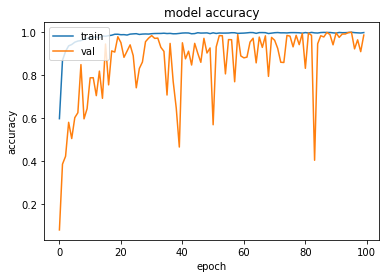

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

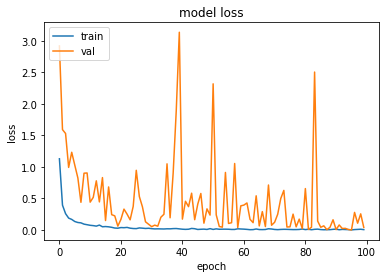

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 8ms/step - loss: 1.8228 - accuracy: 0.7434


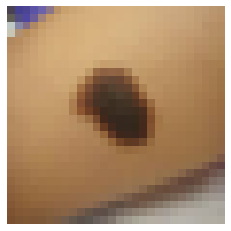

1/1 [==============================] - 0s 16ms/step
[1.3919893e-08 4.6923315e-10 1.7206126e-08 1.0793452e-08 9.9999797e-01
 3.0817844e-08 2.0250718e-06]
('nv', ' melanocytic nevi')


In [36]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

image = PIL.Image.open('D:/Downloads/3.jpeg')
image = image.resize((28, 28))
img = np.array(image)

plt.imshow(img)
plt.axis('off') 
plt.show()

img = img.reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])

result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])


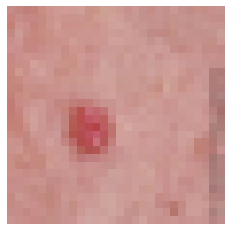

1/1 [==============================] - 0s 18ms/step
[1.53706875e-02 4.51439284e-02 5.54567727e-04 6.42717758e-04
 2.60776669e-01 6.60981059e-01 1.65303424e-02]
('vasc', ' pyogenic granulomas and hemorrhage')


In [39]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

image = PIL.Image.open('D:/Downloads/basalCellCarcinomaBCC_6163_lg.jpg')
image = image.resize((28, 28))
img = np.array(image)

plt.imshow(img)
plt.axis('off') 
plt.show()

img = img.reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])

result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])


In [28]:
import os

# Specify the directory path where you want to save the model
directory_path = 'D:/PROJECT'

# Check if the directory already exists, if not, create it
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created.")
else:
    print(f"Directory '{directory_path}' already exists.")


Directory 'D:/PROJECT' already exists.


In [30]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier  # Replace with your actual model import

# Create and train your machine learning model
# Example: model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Specify the directory path where you want to save the model
directory_path = 'D:/PROJECT/SDC'

# Check and create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the model using joblib
model_filename = 'model1.joblib'
model_filepath = os.path.join(directory_path, model_filename)
joblib.dump(model, model_filepath)

print(f"Model saved successfully at {model_filepath}")


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_5
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...la